In [21]:
from keras.preprocessing.image import load_img, ImageDataGenerator
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, SeparableConv2D
from keras import optimizers
from keras.metrics import Recall, Precision, AUC
import matplotlib.pyplot as plt

https://www.radiologyinfo.org/en/info.cfm?pg=pneumonia

Chest x-ray: An x-ray exam will allow your doctor to see your lungs, heart and blood vessels to help determine if you have pneumonia. When interpreting the x-ray, the radiologist will look for white spots in the lungs (called infiltrates) that identify an infection. This exam will also help determine if you have any complications related to pneumonia such as abscesses or pleural effusions (fluid surrounding the lungs).

https://www.wikidoc.org/index.php/Pneumonia_chest_x_ray

Chest X-Ray
Indications
Patients with the following conditions should be evaluated with a chest X-ray:[1]

Fever (>37.8° C / 100° F)
Tachypnea (> 20 breaths/min)
Tachycardia (> 100 bpm)
Decreased breath sounds and crackles in the physical exam
Findings
X-rays of the chest reveal areas of opacity.
A normal chest x-ray makes community-acquired pneumonia (CAP) less likely; however, CAP is sometimes not seen on x-rays because the disease is either in its initial stages or involves a part of the lung not easily seen by x-ray.
X-rays can be misleading, because other problems, like lung scarring and congestive heart failure, can mimic pneumonia on x-ray.[2] Chest x-rays are also used to evaluate for complications of pneumonia.
Chest x-ray findings are usually nonspecific in viral pneumonia.
Computed tomography is used in situations when the diagnosis is not clear with a chest x-ray.

Hospital Acquired
The American Thoracic Society recommends that all patients with a suspicion of nosocomial pneumonia should have a chest x-ray to confirm diagnosis and determine the severity of the disease.[3]
A chest X-ray also helps to determine pleural effusions or cavitations, as a possible complication.
Ideally, the chest X-ray should be posteroanterior and lateral, but this will depend on the patient's condition.
Findings include the following:[4]
Unilateral or bilateral consolidation
Air bronchogram
Pleural effusion
Cavitation
Ground glass opacities
Chest x-ray is also used to assess improvement or lack of clinical response in hospitalized patients.

### Normal

In [ ]:
load_img('../data/train/NORMAL/IM-0115-0001.jpeg')

### Pneumonia

In [ ]:
load_img('../data/train/PNEUMONIA/person1_bacteria_1.jpeg')

In [9]:
datagen = ImageDataGenerator(rescale = 1./255)
train_it = datagen.flow_from_directory('../data/train/',
                                       class_mode='binary',
                                       target_size = (64,64),
                                       batch_size = 5132)
val_it = datagen.flow_from_directory('../data/val/',
                                     class_mode='binary',
                                     target_size = (64,64),
                                     batch_size = 100)
test_it = datagen.flow_from_directory('../data/test/',
                                      class_mode='binary', 
                                      target_size = (64,64),
                                      batch_size = 624)
X_train, Y_train = train_it.next()
X_val, Y_val = val_it.next()
X_test, Y_test = test_it.next()

Y_train = Y_train.reshape(5132,1)
Y_val = Y_val.reshape(100,1)
Y_test = Y_test.reshape(624,1)

Found 5132 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [28]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (4, 4), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc', Precision(), Recall(), AUC()])

history = model.fit(X_train,
                    Y_train,
                    epochs=4,
                    batch_size = 32,
                    validation_data=(X_val, Y_val))
score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Test precision:', score[2])
print('Test recall:', score[3])
print('Test AUC:', score[4])

Epoch 1/4
161/161 [==============================] - 15s 93ms/step - loss: 0.3960 - acc: 0.7913 - precision_3: 0.7866 - recall_6: 0.9888 - auc_1: 0.8755 - val_loss: 0.4116 - val_acc: 0.8800 - val_precision_3: 0.8167 - val_recall_6: 0.9800 - val_auc_1: 0.9886
Epoch 2/4
161/161 [==============================] - 16s 98ms/step - loss: 0.2572 - acc: 0.9236 - precision_3: 0.9199 - recall_6: 0.9833 - auc_1: 0.9751 - val_loss: 0.3809 - val_acc: 0.9600 - val_precision_3: 0.9259 - val_recall_6: 1.0000 - val_auc_1: 0.9912
Epoch 3/4
161/161 [==============================] - 15s 93ms/step - loss: 0.2192 - acc: 0.9486 - precision_3: 0.9551 - recall_6: 0.9770 - auc_1: 0.9844 - val_loss: 0.3278 - val_acc: 0.9500 - val_precision_3: 0.9091 - val_recall_6: 1.0000 - val_auc_1: 0.9968
Epoch 4/4
161/161 [==============================] - 15s 94ms/step - loss: 0.1951 - acc: 0.9571 - precision_3: 0.9676 - recall_6: 0.9752 - auc_1: 0.9871 - val_loss: 0.3902 - val_acc: 0.9000 - val_precision_3: 0.8333 - val_r

In [26]:
score

[0.4016841650009155,
 0.8349359035491943,
 0.8033826351165771,
 0.9743589758872986]

### Plots

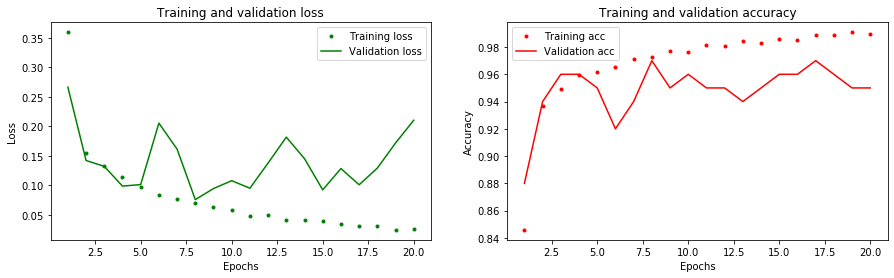

In [13]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']


epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.predict(X_val)

In [ ]:
y_val